# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [ ]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [ ]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [ ]:
#please don't change random state
# you need not standardize the data as it is already standardized
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [ ]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [ ]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

<font color='red'>Intializing the parameters </font>

In [ ]:
def initialize_weights(dim):
  ''' In this function, we will intialize our weight and bias'''
  #intialize he weights to zero array of(dim,1)dimensions
  #you use zeros_like function to intialize zero , check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
  #intialize bias to zero
  w = np.zeros_like(dim)
  b = 0
  return w,b

In [ ]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [ ]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='red'>Computing the sigmoid </font>

In [ ]:
#https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigm = (1/(1+np.exp(-z))) #𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑧)=1/(1+𝑒𝑥𝑝(−𝑧))
    #printing the sigmoid (z) output
    return sigm
   

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='red'>Compute loss </font>


In [ ]:
def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
    log_loss = 0
    for i in range(len(y_true)):
      log_loss += (y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i])*np.log10(1-y_pred[i])) # 𝑙𝑜𝑔𝑙𝑜𝑠𝑠=−1∗1𝑛Σ𝑓𝑜𝑟𝑒𝑎𝑐ℎ𝑌𝑡,𝑌𝑝𝑟𝑒𝑑(𝑌𝑡𝑙𝑜𝑔10(𝑌𝑝𝑟𝑒𝑑)+(1−𝑌𝑡)𝑙𝑜𝑔10(1−𝑌𝑝𝑟𝑒𝑑))
    loss = -1 * (1/len(y_true)) * log_loss
    return loss #printing the final loss




In [ ]:
#round off the value to 8 values
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(np.round(loss,6)==0.076449)
  return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)

True

# <font color='red' size=5> Compute gradient w.r.to 'w' </font>

In [ ]:
#make sure that the sigmoid function returns a scalar value, you can use dot function operation
#https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w,x)+b) - (alpha/N) * w) #𝑑𝑤(𝑡)=𝑥𝑛(𝑦𝑛−σ((𝑤(𝑡))𝑇𝑥𝑛+𝑏𝑡))−λ𝑁𝑤(𝑡)
    return dw #printing dw value with respect to w

In [ ]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.round(np.sum(grad_dw),5)==4.75684)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

# <font color='red' size=5> Compute gradient w.r.to 'b' </font>

In [ ]:
#sb should be a scalar value
#https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = (y - sigmoid(np.dot(w,x) + b))
     #printing the final db value with respect to b
     return db

In [ ]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

# <font color='red' size=5>Implementing logistic regression</font>

In [ ]:
from tqdm import tqdm

#https://www.datacamp.com/tutorial/understanding-logistic-regression-python
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
    # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process 
        # you have to return w,b , train_loss and test loss
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    loss_tr = []
    loss_te = []
    #write your code to perform SGD
    for i in range(epochs): #for every data point in the X_train,y_train
      tr_pred =[] 
      te_pred =[]
      for j in range(N):
        #computing the gradient and calling the gradient_dw,gradient_db function
        dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
        db = gradient_db(X_train[j],y_train[j],w,b)
        
        #now updating the w,b values
        w = w+(dw * eta0)
        b = b+(db * eta0)
      
      #now getting the output of x_train all data with respect to w,b
      for value in range(N):
        tr_pred.append(sigmoid(np.dot(w,X_train[value]+b)))
      
      #calculating the loss between the actual annd predicted values by calling logloss function
      tr_loss = logloss(y_train,tr_pred)

      #using list to store the values
      loss_tr.append(tr_loss)

      #now getting the output of x_test all data with respect to w,b
      for value in range(len(X_test)):
        te_pred.append(sigmoid(np.dot(w,X_test[value]+b)))

      #calculating the loss between the actual annd predicted values by calling logloss function
      te_loss = logloss(y_test,te_pred)

      #using list to store the values
      loss_te.append(te_loss)

    return w,b,loss_tr,loss_te





In [ ]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=25
w,b,train_logloss,test_logloss = train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

## <font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in order of 10^-2

In [ ]:

print(clf.coef_,clf.intercept_)

[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]] [-0.8531383]


In [ ]:
print(w-clf.coef_, b-clf.intercept_)

[[-0.00632748  0.00752905  0.00015761 -0.00335002 -0.0129599   0.00971424
   0.00724224  0.0041581   0.0124993  -0.00707119  0.00164479 -0.00476134
  -0.00167892  0.00055716  0.00030819]] [-0.03849861]


As we can see the above result shows the between sklearm and custom implmentation in the 10^-3

In [ ]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
differece_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True


## <font color='red'>Plotting the graph</font>



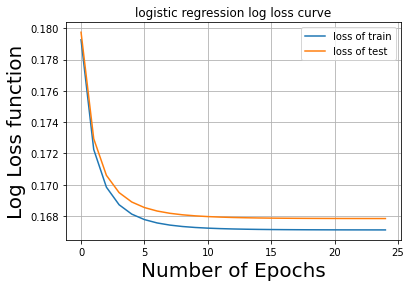

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()
 
ep = [k for k in range(0,25,1)]
plt.plot(ep,train_logloss, label='loss of train')
plt.plot(ep,test_logloss, label='loss of test')
plt.xlabel("Number of Epochs",fontsize=20)
plt.ylabel("Log Loss function",fontsize=20)
plt.title('logistic regression log loss curve')
plt.legend()